# Plot data from several tests on the same Figure

Generic libraries:

In [1]:
from functools import partial
from pathlib import Path
import tomllib

import numpy as np

Other libraries required for this notebook:

In [2]:
from multipac_testbench.src.test_campaign import TestCampaign
import multipac_testbench.src.instruments as ins
from multipac_testbench.src.util.post_treaters import running_mean
from multipac_testbench.src.util.multipactor_detectors import \
    quantity_is_above_threshold

Define the project path, load the configuration.

In [3]:
project = Path("../data/campaign")
config_path = Path(project, "testbench_configuration.toml")

with open(config_path, "rb") as f:
    config = tomllib.load(f)

In [4]:
frequencies = (120., 120., 120., 120., 120.)
swrs = (1., 2., 4., 10., np.inf)
info = ('', '', '', '', 'short-circuit')
filepaths = (
    Path(project, "120MHz_travelling.csv"),
    Path(project, "120MHz_SWR2.csv"),
    Path(project, "120MHz_SWR4.csv"),
    Path(project, "120MHz_SWR10.csv"),
    Path(project, "120MHz_short-circuit.csv")
)
test_campaign = TestCampaign.from_filepaths(filepaths,
                                            frequencies,
                                            swrs,
                                            config,
                                            info=info,
                                            sep='\t')

[INFO    ] [factory.py          ] 1 set of global diagnostics defined:
	GlobalDiagnostic global, with instruments: ['ForwardPower (NI9205_Power1)', 'ReflectedPower (NI9205_Power2)', 'ReflectionCoefficient (Reflection_coefficient)', 'SWR (SWR)', 'Frequency (Reference frequency)']
[INFO    ] [factory.py          ] 10 pick-ups created:
[INFO    ] [factory.py          ] 	Pick-Up E1 at z = 0.000m, with instruments: ['CurrentProbe (NI9205_MP1l)', 'FieldProbe (NI9205_E1)']
[INFO    ] [factory.py          ] 	Pick-Up V1 at z = 0.130m, with instruments: ['Penning (NI9205_Penning1)']
[INFO    ] [factory.py          ] 	Pick-Up E2 at z = 0.260m, with instruments: ['CurrentProbe (NI9205_MP2l)', 'FieldProbe (NI9205_E2)']
[INFO    ] [factory.py          ] 	Pick-Up E3 at z = 0.390m, with instruments: ['CurrentProbe (NI9205_MP3l)', 'FieldProbe (NI9205_E3)']
[INFO    ] [factory.py          ] 	Pick-Up V2 at z = 0.611m, with instruments: ['Penning (NI9205_Penning)']
[INFO    ] [factory.py          ] 	Pick-

Prepare visualisation

In [5]:
to_plot = ins.SWR
figsize = (8, 8)

By default, every `MultipactorTest` data will be plotted in a separated `Figure`:

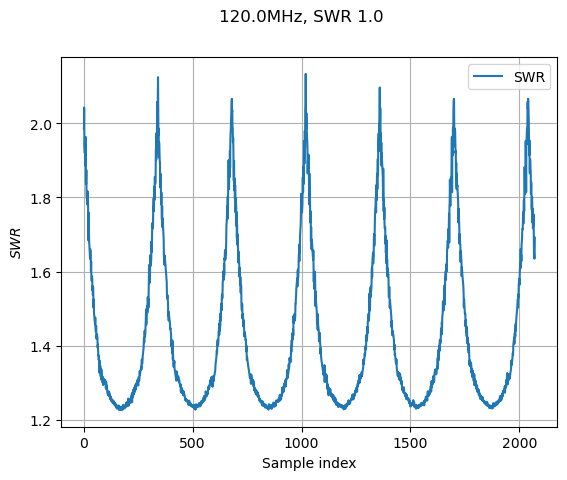

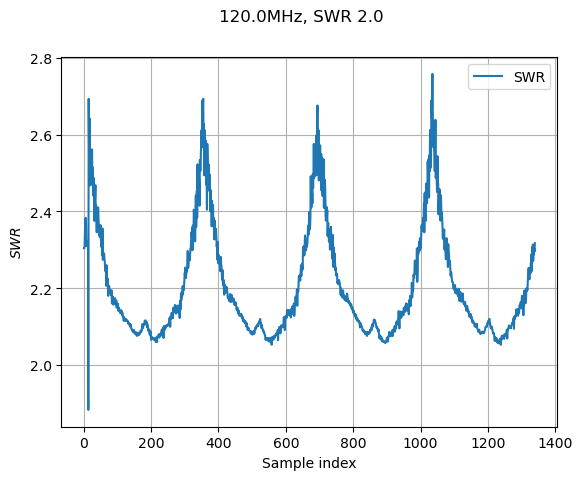

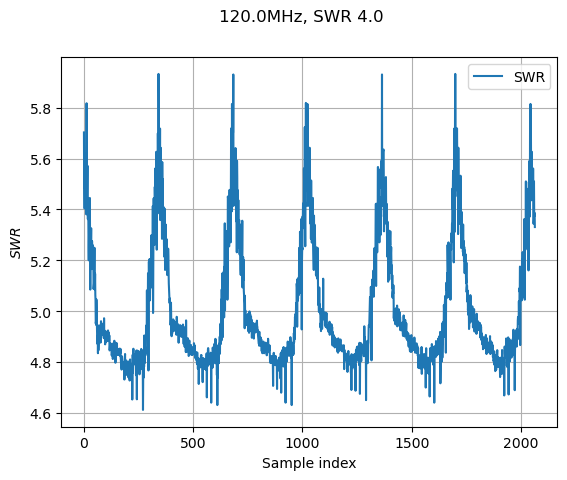

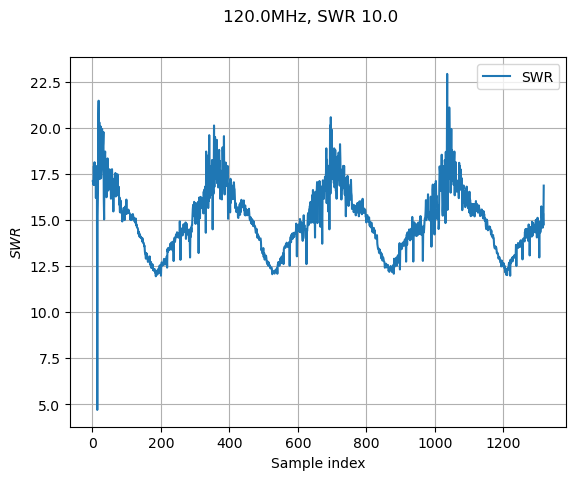

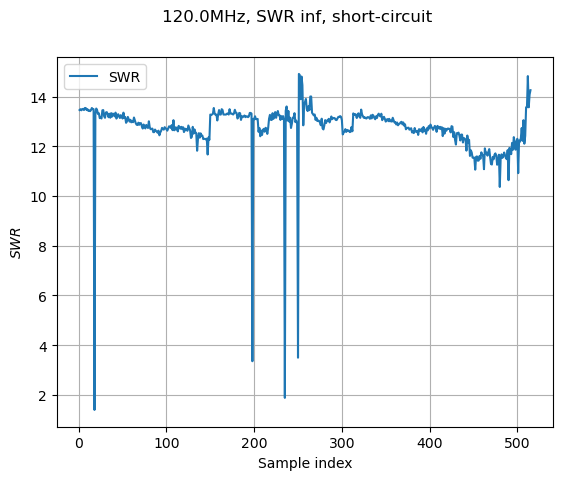

In [6]:
_, _ = test_campaign.sweet_plot(to_plot)

You can merge them by adding the `all_on_same_plot=True` keyword. Note that the behavior with plotting several instruments is untested.

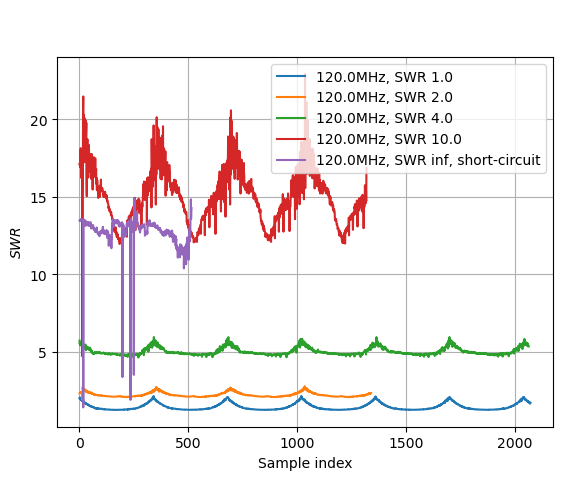

In [7]:
_, _ = test_campaign.sweet_plot(to_plot, all_on_same_plot=True)